# Linear Regression, Linear Algebra Review and Nonparametric Methods
# (The Bootstrap & Permutation Tests)


# Tasks: Plotting Data

Use the built-in iris dataset:

• Use the hist() function to plot a histogram of iris sepal width. Label the axes properly.

• Create a scatterplot of iris sepal width vs. iris sepal length. Color the points by whether or not the species is versicolor.

• Create side-by-side boxplots of iris petal length for each species.

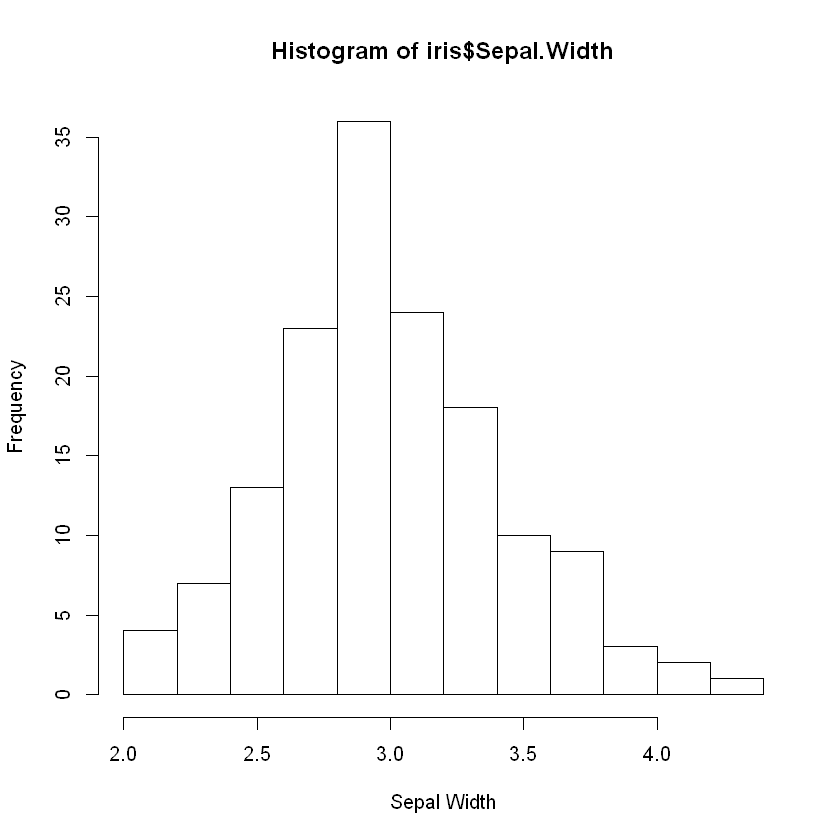

In [1]:
# Use the hist() function to plot a histogram of iris sepal width. Label the 
# axes properly.

hist(iris$Sepal.Width, xlab = 'Sepal Width')

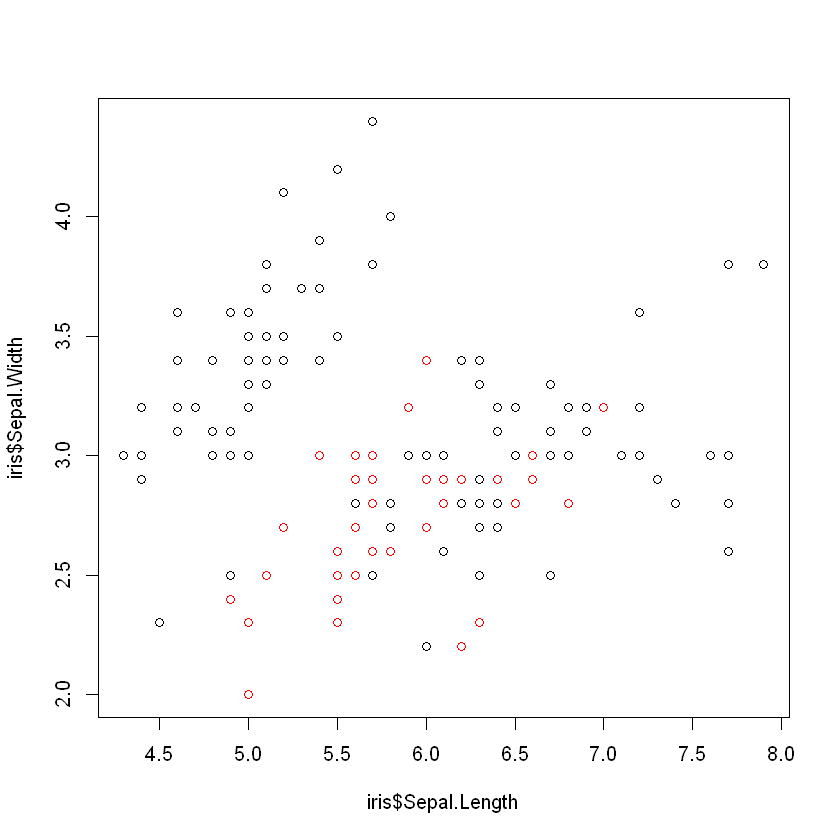

In [2]:
# Create a scatterplot of iris sepal width vs. iris sepal length. Color the points
# by whether or not the species is versicolor.

iris$IsVersicolor <- ifelse(iris$Species == 'versicolor', 1, 0)
iris$IsVersicolor <- factor(iris$IsVersicolor)
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$IsVersicolor)

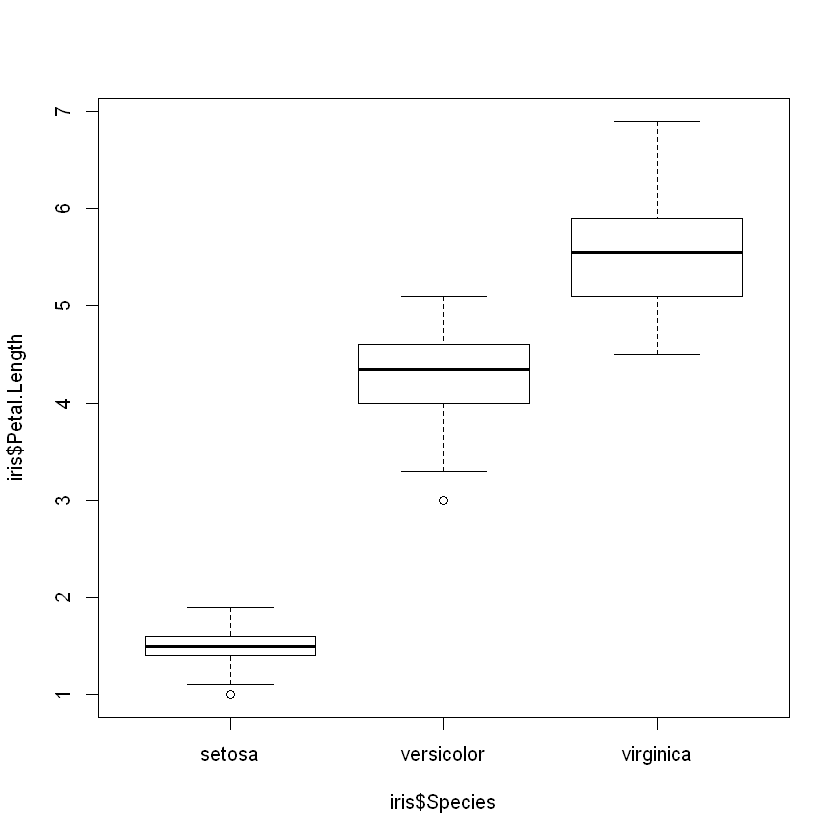

In [3]:
# Create side-by-side boxplots of iris petal length for each species.
boxplot(iris$Petal.Length~iris$Species)

# Multiple Linear Regression

## Example
A large national grocery retailer tracks productivity and costs of its facilities closely. Consider a data set obtained from a single distribution center for a one-year period. Each data point for each variable represents one week of activity. The variables included are number of cases shipped in thousands (X1), the indirect costs of labor as a percentage of total costs (X2), a qualitative predictor called holiday that is coded 1 if the week has a holiday and 0 otherwise (X3), and total labor hours (Y).

## What information would be useful to provide such a model?
• Is there a relationship between holidays and total labor hours? What about number of cases shipped? Indirect costs?

• How strong are these relationships?

• Is the relationship linear?

# General Model

$$
Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \epsilon, 
$$

$$
where: \epsilon \sim N(0,\sigma^{2})
$$

We can represent this in a matrix form as following:

$$
Y = X\beta + \epsilon
$$

$$
where: Y = (Y_{1}, Y_{2}, Y_{3},...)^{T} \in \mathbb{R}^{n},\qquad X = design matrix \in \mathbb{R}^{n\times (p+1)}\\
\beta = (\beta_{1}, \beta_{2}, \beta_{3},...)^{T} \in \mathbb{R}^{(p+1)}, \qquad \epsilon = (\epsilon_{1}, \epsilon_{2}, \epsilon{3},...)^{T} \in \mathbb{R}^{n}
$$

## The design matrix X

The structure of the design matrix X is as following:

$$
\left[\begin{matrix}
    1&X_{11}&X_{12}&...&X_{1p}\\
    1&X_{21}&X_{22}&...&X_{2p}\\
    .&.&.&.&.\\
    .&.&.&.&.\\
    .&.&.&.&.\\
    1&X_{n1}&X_{n2}&...&X_{np}\end{matrix}\right]
$$

Since:
$$
\beta = (\beta_{1}, \beta_{2}, \beta_{3},...)^{T},
$$
therefore we have:

$$
X\beta = 
\left[\begin{matrix}
    1&X_{11}&X_{12}&...&X_{1p}\\
    1&X_{21}&X_{22}&...&X_{2p}\\
    .&.&.&.&.\\
    .&.&.&.&.\\
    .&.&.&.&.\\
    1&X_{n1}&X_{n2}&...&X_{np}\end{matrix}\right] \cdot \left[\begin{matrix}
    \beta_{0}\\
    \beta_{1}\\
    .\\
    .\\
    .\\
    \beta_{p}\end{matrix}\right] = \left[\begin{matrix}
    \beta_{0}+\beta_{1}X_{11}+\beta_{2}X_{12}+...+\beta_{p}X_{1p}\\
    \beta_{0}+\beta_{1}X_{21}+\beta_{2}X_{22}+...+\beta_{p}X_{2p}\\
    .\\
    .\\
    .\\
    \beta_{0}+\beta_{1}X_{n1}+\beta_{2}X_{n2}+...+\beta_{p}X_{np}\end{matrix}\right]
$$

Therefore, we have the total structure of the vector of response variables Y:

$$
Y = \left[\begin{matrix}
    Y_{1}\\
    Y_{2}\\
    .\\
    .\\
    .\\
    Y_{n}\end{matrix}\right] = \left[\begin{matrix}
    \beta_{0}+\beta_{1}X_{11}+\beta_{2}X_{12}+...+\beta_{p}X_{1p}+\epsilon_{1}\\
    \beta_{0}+\beta_{1}X_{21}+\beta_{2}X_{22}+...+\beta_{p}X_{2p}+\epsilon_{2}\\
    .\\
    .\\
    .\\
    \beta_{0}+\beta_{1}X_{n1}+\beta_{2}X_{n2}+...+\beta_{p}X_{np}+\epsilon_{n}\end{matrix}\right]
$$

# Parameter Estimation
## Least Squares Estimate

Define an objective function Q(b) as follows:
$$
\begin{align}
Q(b_{0},b_{1},...,b_{p}) &= \sum\limits_{i=1}^{n}(Y_{i}-(b_{0}+b_{1}X_{i1}+b_{2}X_{i2}+...+b_{p}X_{ip}))^{2}\\
&=\left\|Y-Xb\right\|^{2}
\end{align}
$$

Our goal is minimize the objective function:
$$
min: Q(b_{0},b_{1},...,b_{p})\\
$$
with respect to:
$$
b = (b_{0},b_{1},...,b_{p})^{T} \in \mathbb{R}^{p+1}
$$

## Theorem
If the design matrix X is full column rank (列满秩，即矩阵秩=列数，列向量线性无关），then the global minimum of:
$$
Q(b)=\left\|Y-Xb\right\|^{2}
$$
with respect to: 
$$b = (b_{0},b_{1},...,b_{p})^{T} \in \mathbb{R}^{p+1}
$$ is:

$$
\hat{\beta} = (X^{T}X)^{-1}X^{T}Y
$$


## Proof

$$
\begin{align}
Q(b) = \left\|Y-Xb\right\|^{2} &= (Y-Xb)^{T}(Y-Xb)\\
&= (Y^{T}-(Xb)^{T})(Y-Xb)\\
&= Y^{T}Y-(Xb)^{T}Y-Y^{T}(Xb)+(Xb)^{T}Xb\\
&= b^{T}X^{T}Xb-2Y^{T}Xb+Y^{T}Y
\end{align}
$$

Taking the first partial derivative (or gradient since b is actaully a vector) with respect to b, and then equating the derivative to 0, which gives:

$$
\begin{align}
\frac{d}{db}(b^{T}X^{T}Xb-2b^{T}X^{T}Y+Y^{T}Y) &= 0\\
\mathbf{I}^{T}X^{T}Xb + b^{T}X^{T}X\mathbf{I}-2Y^{T}X\mathbf{I} &= 0\\
2\mathbf{I}^{T}X^{T}Xb - 2Y^{T}X\mathbf{I} &= 0\\
\end{align}
$$

where $\mathbf{I}$ is a column vector of 1 with size $(p+1) \times 1$ (the same as vector b). 

Then we have:

$$
\begin{align}
\mathbf{I}^{T}X^{T}Xb &= Y^{T}X\mathbf{I}\\
\mathbf{I}^{T}X^{T}Xb &= \mathbf{I}^{T}X^{T}Y\\
X^{T}Xb & = X^{T}Y\\
b = \hat{\beta} &= (X^{T}X)^{-1}X^{T}Y\\
\end{align}
$$

In [4]:
Grocery <- read.table("Kutner_6_9.txt", header=T)
head(Grocery)

Y,X1,X2,X3
4264,305.657,7.17,0
4496,328.476,6.20,0
4317,317.164,4.61,0
4292,366.745,7.02,0
4945,265.518,8.61,1
4325,301.995,6.88,0


In [5]:
# Construct design matrix X

X <- cbind(rep(1,dim(Grocery)[1]), Grocery$X1, Grocery$X2, Grocery$X3)
head(X)
Y <- Grocery$Y

1,305.657,7.17,0
1,328.476,6.20,0
1,317.164,4.61,0
1,366.745,7.02,0
1,265.518,8.61,1
1,301.995,6.88,0


According to the theorem and equation I derived above:
$$
\hat{\beta} = (X^{T}X)^{-1}X^{T}Y
$$

In [6]:
hat_beta <- solve(t(X)%*%X)%*%t(X)%*%Y
hat_beta <- round(hat_beta, 2)
hat_beta

4149.89
0.79
-13.17
623.55


From the $\hat{\beta}$ output, we know the prediction function is:

$$
\hat{Y} = 4149.89+0.79X1-13.17X2+623.55X3
$$

## Linear model lm() can also be applied

In [7]:
lm0 <- lm(Y ~ X1 + X2 + X3, data = Grocery)
summary(lm0)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = Grocery)

Residuals:
    Min      1Q  Median      3Q     Max 
-264.05 -110.73  -22.52   79.29  295.75 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4149.8872   195.5654  21.220  < 2e-16 ***
X1             0.7871     0.3646   2.159   0.0359 *  
X2           -13.1660    23.0917  -0.570   0.5712    
X3           623.5545    62.6409   9.954 2.94e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 143.3 on 48 degrees of freedom
Multiple R-squared:  0.6883,	Adjusted R-squared:  0.6689 
F-statistic: 35.34 on 3 and 48 DF,  p-value: 3.316e-12


In [8]:
# Compute residuals with residuals()
resi <- residuals(lm0)[1:5]
head(resi)

# Compute fitted values with fitted()
fitted_values <- fitted(lm0)[1:5]
head(fitted_values)

1         2         3         4         5 
-32.06348 169.20509 -21.82543 -54.11955  75.93372

1        2        3        4        5 
4296.063 4326.795 4338.825 4346.120 4869.066

In [9]:
library('MASS')
head(cats)

Sex,Bwt,Hwt
F,2.0,7.0
F,2.0,7.4
F,2.0,9.5
F,2.1,7.2
F,2.1,7.3
F,2.1,7.6


In [10]:
Fcats <- cats[cats$Sex == 'F',]
Mcats <- cats[cats$Sex == 'M',]
t.test(Fcats$Hwt, Mcats$Hwt)


	Welch Two Sample t-test

data:  Fcats$Hwt and Mcats$Hwt
t = -6.5179, df = 140.61, p-value = 1.186e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.763753 -1.477352
sample estimates:
mean of x mean of y 
 9.202128 11.322680 


In [11]:
D <- mean(Fcats$Hwt) - mean(Mcats$Hwt)
Fnum <- dim(Fcats)[1]
Mnum <- dim(Mcats)[1]
D
Fnum
Mnum

[1] -2.120553

[1] 47

[1] 97

In [12]:
D_abs <- abs(D)
Dirac_count <- 0
P <- 100000

for(i in 1:100000){
    resample_vec <- sample(1:(Fnum+Mnum), Fnum, replace = FALSE)
    resample_Fcats <- cats$Hwt[resample_vec]
    resample_Mcats <- cats$Hwt[-resample_vec]
    resample_D_abs <- abs(mean(resample_Fcats) - mean(resample_Mcats))
    
    if(resample_D_abs>=D_abs){
        Dirac_count = Dirac_count+1
    }
}
Dirac_count
p_value <- Dirac_count / P
p_value

[1] 0

[1] 0